In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("C:/Users/iannr/OneDrive/Desktop/Data_Projects/Kiva_Loans/kiva_loans.csv")
data

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Helper Fnctions

In [9]:
def encode_dates(df, column):
    df = df.copy()
    
    df[column] = pd.to_datetime(df[column])
    
    df[column + "_year"] = df[column].apply(lambda x: x.year)
    df[column + "_month"] = df[column].apply(lambda x: x.month)
    df[column + "_day"] = df[column].apply(lambda x: x.day)
    
    df[column + "_hour"] = df[column].apply(lambda x: x.hour)
    df[column + "_minute"] = df[column].apply(lambda x: x.minute)
    df[column + "_second"] = df[column].apply(lambda x: x.second)
    
    df = df.drop(column, axis=1)
    
    return df

In [10]:
def get_male_count(x):
    count = 0
    for gender in str(x).split(', '):
        if gender == 'male':
            count += 1
    return count

def get_female_count(x):
    count = 0
    for gender in str(x).split(', '):
        if gender == 'female':
            count += 1
    return count

In [11]:
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    return df

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop id column
    df = df.drop('id', axis=1)
    
    # Drop use and tags columns (avoiding NLP)
    df = df.drop(['use', 'tags'], axis=1)
    
    # Drop country and date columns (redundant information)
    df = df.drop(['country', 'date'], axis=1)
    
    # Drop region column (high-cardinality)
    df = df.drop('region', axis=1)
    
    # Extract date features
    df = encode_dates(df, column='posted_time')
    df = encode_dates(df, column='disbursed_time')
    df = encode_dates(df, column='funded_time')
    
    # Engineer gender count features
    df['male_count'] = df['borrower_genders'].apply(get_male_count)
    df['female_count'] = df['borrower_genders'].apply(get_female_count)
    df = df.drop('borrower_genders', axis=1)
    
    # One-hot encode nominal features
    nominal_features = [
        ('activity', "act"),
        ('sector', "sec"),
        ('country_code', "ctc"),
        ('currency', "cur"),
        ('partner_id', "pid")
    ]
    df = onehot_encode(df, columns_with_prefixes=nominal_features)
    
    # Split df into X and y
    y = df['repayment_interval']
    X = df.drop('repayment_interval', axis=1)
    
    # Encode labels
    label_mapping = {
        'bullet': 0,
        'weekly': 1,
        'monthly': 2,
        'irregular': 3
    }
    y = y.replace(label_mapping)
    
    # Fill in remaining missing values with column means
    missing_value_columns = X.loc[:, X.isna().sum() > 0].columns
    for column in missing_value_columns:
        X[column] = X[column].fillna(X[column].mean())
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [13]:
def evaluate_model(model, X_test, y_test):
    
    results = model.evaluate(X_test, y_test, verbose=0)
    print("    Test Loss: {:.4f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=['bullet', 'weekly', 'monthly', 'irregular'])
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(4) + 0.5, ['bullet', 'weekly', 'monthly', 'irregular'])
    plt.yticks(np.arange(4) + 0.5, ['bullet', 'weekly', 'monthly', 'irregular'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Preprocessing

In [14]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,funded_amount,loan_amount,term_in_months,lender_count,posted_time_year,posted_time_month,posted_time_day,posted_time_hour,posted_time_minute,posted_time_second,...,pid_527.0,pid_528.0,pid_529.0,pid_530.0,pid_531.0,pid_532.0,pid_533.0,pid_534.0,pid_535.0,pid_536.0
0,-0.501282,-0.521352,-0.086520,-0.414631,0.583263,-0.641361,-1.108166,-0.870018,0.938049,-0.371964,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
1,-0.568331,-0.584728,-0.086520,-0.522010,0.583263,0.544460,-1.691507,-1.374886,-1.021950,-0.371964,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
2,-0.590681,-0.605854,-0.668327,-0.557803,-0.365951,-0.641361,0.991863,-0.028572,0.938049,0.607407,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
3,-0.523632,-0.542477,0.728010,-0.486217,-1.315165,1.730281,-0.874829,-0.533440,1.456873,-0.832844,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
4,-0.233087,-0.267845,-0.901050,-0.092492,-0.365951,-1.234272,0.758526,1.822609,0.707461,-0.371964,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469838,-0.411884,-0.436849,-0.668327,-0.593596,0.583263,-1.234272,-1.458171,-0.701729,0.130991,0.607407,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
469839,-0.344835,-0.373473,-0.435604,-0.378838,0.583263,0.840915,-0.058151,1.149452,-0.387833,0.780237,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
469840,0.213906,0.154667,0.495287,0.372818,0.583263,0.544460,-0.874829,-0.701729,-0.676068,-1.581775,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459
469841,-0.098989,-0.141091,0.146203,0.086473,0.583263,0.840915,-0.058151,0.812874,-0.618421,1.298728,...,-0.002918,-0.003262,0.0,-0.001459,-0.001459,-0.001459,-0.007581,0.0,-0.001459,-0.001459


In [15]:
y_train

404258    3
467693    3
228292    3
163497    2
196675    3
         ..
371403    3
491263    3
470924    2
491755    2
128037    3
Name: repayment_interval, Length: 469843, dtype: int64

In [16]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)



Epoch 1/100


11747/11747 [==============================] - 44s 4ms/step - loss: 0.1882 - accuracy: 0.9272 - val_loss: 0.1451 - val_accuracy: 0.9457
Epoch 2/100
11747/11747 [==============================] - 37s 3ms/step - loss: 0.1365 - accuracy: 0.9471 - val_loss: 0.1257 - val_accuracy: 0.9522
Epoch 3/100
11747/11747 [==============================] - 38s 3ms/step - loss: 0.1223 - accuracy: 0.9529 - val_loss: 0.1181 - val_accuracy: 0.9554
Epoch 4/100
11747/11747 [==============================] - 38s 3ms/step - loss: 0.1157 - accuracy: 0.9558 - val_loss: 0.1163 - val_accuracy: 0.9563
Epoch 5/100
11747/11747 [==============================] - 35s 3ms/step - loss: 0.1100 - accuracy: 0.9577 - val_loss: 0.1180 - val_accuracy: 0.9571
Epoch 6/100
11747/11747 [==============================] - 39s 3ms/step - loss: 0.1068 - accuracy: 0.9593 - val_loss: 0.1146 - val_accuracy: 0.9578
Epoch 7/100
11747/11747 [==============================] - 38s 3ms/step - loss: 0.1034 - accuracy: 0.9606 - 

Results

    Test Loss: 0.1132
Test Accuracy: 95.81%
6293/6293 [==============================] - 18s 3ms/step


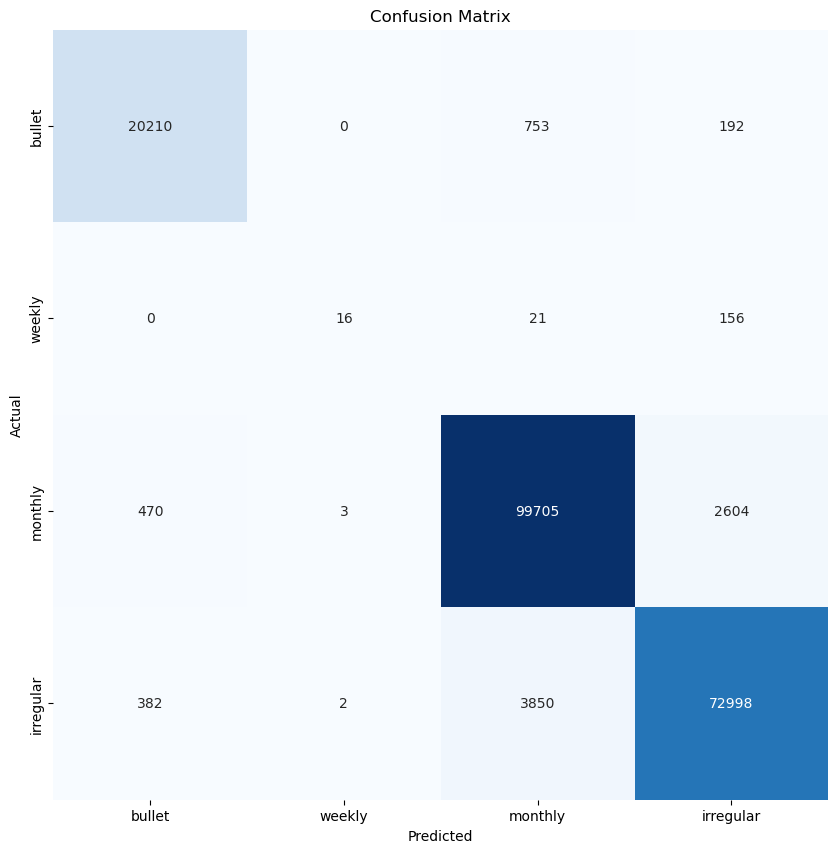

Classification Report:
----------------------
               precision    recall  f1-score   support

      bullet       0.96      0.96      0.96     21155
      weekly       0.76      0.08      0.15       193
     monthly       0.96      0.97      0.96    102782
   irregular       0.96      0.95      0.95     77232

    accuracy                           0.96    201362
   macro avg       0.91      0.74      0.76    201362
weighted avg       0.96      0.96      0.96    201362



In [17]:
evaluate_model(model, X_test, y_test)